In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('spam.csv', sep=',', encoding='latin-1', usecols=lambda col: col not in ["Unnamed: 2","Unnamed: 3","Unnamed: 4"])

In [3]:
df.head(5)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df = df.rename(columns={"v1":"label", "v2":"text"})

In [5]:
df.head(5)

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<ipython-input-17-3e069f726b7a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")


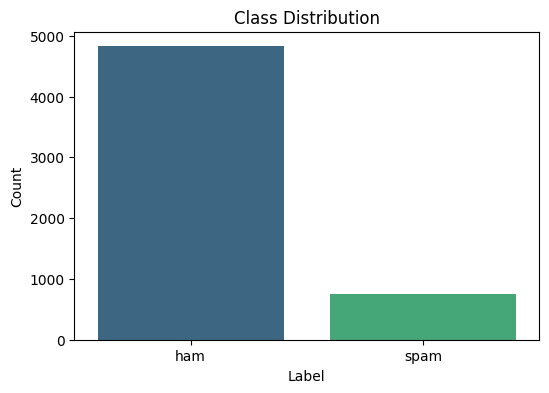

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns


class_counts = df['label'].value_counts()


plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
plt.title('Class Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


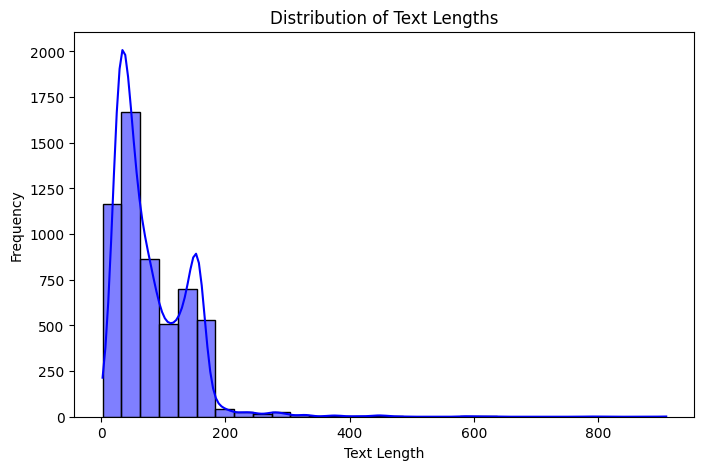

In [18]:

df['text_length'] = df['text'].apply(len)


plt.figure(figsize=(8, 5))
sns.histplot(df['text_length'], kde=True, bins=30, color='blue')
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()


<ipython-input-19-f538971d98da>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=np.array(words), y=np.array(counts), palette='magma')


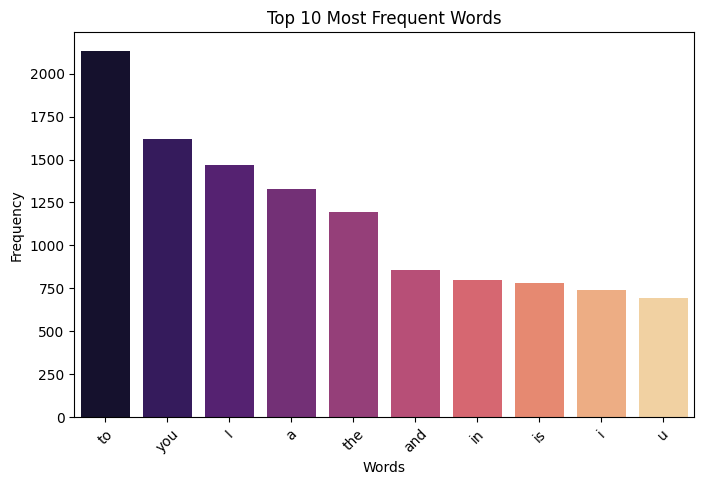

In [19]:
from collections import Counter
import numpy as np


all_words = " ".join(df['text']).split()
word_counts = Counter(all_words)


common_words = word_counts.most_common(10)
words, counts = zip(*common_words)


plt.figure(figsize=(8, 5))
sns.barplot(x=np.array(words), y=np.array(counts), palette='magma')
plt.title('Top 10 Most Frequent Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


In [6]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train,X_test,y_train,y_test = train_test_split(df["text"],df["label"], test_size = 0.2, random_state = 42)

In [9]:
vect.fit(X_train)

CountVectorizer()

In [10]:


X_train_df = vect.transform(X_train)
X_test_df = vect.transform(X_test)
type(X_train_df)

scipy.sparse._csr.csr_matrix

In [11]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_df,y_train)

LogisticRegression()

In [12]:
prediction = dict()

prediction["Logistic"] = model.predict(X_test_df)

In [13]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [14]:
accuracy_score(y_test,prediction["Logistic"])

0.9775784753363229

In [15]:
print(classification_report(y_test,prediction["Logistic"]))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.99      0.84      0.91       150

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [16]:
while True:
    user_input = input("Enter a text to predict (or type 'exit' to quit): ")

    if user_input.lower() == 'exit':
        print("Exiting the program.")
        break

    # Transform the user input using the fitted vectorizer
    input_transformed = vect.transform([user_input])

    # Predict the label using the trained model
    prediction = model.predict(input_transformed)

    # Output the result
    print(f"The predicted label for the given text is: {prediction[0]}")


Enter a text to predict (or type 'exit' to quit): Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ent
The predicted label for the given text is: spam
Enter a text to predict (or type 'exit' to quit): exit
Exiting the program.
